## Data Munging Solutions

In [6]:
import pandas as pd

In [7]:
# Import data and investigate
data = pd.read_csv('train.csv')
data.info()
print(data.head())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                           

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# Convert Sex into boolean value
data['Is_female'] = data.Sex.replace(['female','male'],[True,False])

data[['Name','Sex','Is_female']].head()

,Name,Sex,Is_female
0,"Braund, Mr. Owen Harris",male,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,True
2,"Heikkinen, Miss. Laina",female,True
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,True
4,"Allen, Mr. William Henry",male,False


In [4]:
data.Sex=='female'
# data['Is_female'] = data.Sex=='female'

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882     True
883    False
884    False
885     True
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [8]:
embarked = pd.get_dummies(data.Embarked, prefix = 'Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
# Two ways to merge data (both have same results)
data = pd.merge(data,embarked,left_index=True,right_index=True)
# data = data.merge(embarked,left_index=True,right_index=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,0,1


In [8]:
'Braund, Mr. Owen Harris'.split(', ')

['Braund', 'Mr. Owen Harris']

In [7]:
['Braund', 'Mr. Owen Harris'][0]

'Braund'

In [10]:
'Mr. Owen Harris'.split('. ')

['Mr', 'Owen Harris']

In [11]:
['Mr', 'Owen Harris'][0]

'Mr'

In [12]:
'Braund, Mr. Owen Harris'.split(', ')[1].split('. ')[0]

'Mr'

In [17]:
print(data.Name[0])
print(data.Name[0].split(', '))
print(data.Name[0].split(', ')[1])
print(data.Name[0].split(', ')[1].split('. '))
print(data.Name[0].split(', ')[1].split('. ')[0])

Braund, Mr. Owen Harris
['Braund', 'Mr. Owen Harris']
Mr. Owen Harris
['Mr', 'Owen Harris']
Mr


In [35]:
# data.Name.split(', ')[1].split('. ')[0]

In [11]:
def split_name(name):
    return name.split(', ')

split_names = []
for name in data.Name:
    split = split_name(name)
    split_names.append(split)
    
#print(split_names)

print(data.Name.apply(split_name))
#print(split_name(data.Name))

0                              [Braund, Mr. Owen Harris]
1      [Cumings, Mrs. John Bradley (Florence Briggs T...
2                               [Heikkinen, Miss. Laina]
3         [Futrelle, Mrs. Jacques Heath (Lily May Peel)]
4                             [Allen, Mr. William Henry]
5                                     [Moran, Mr. James]
6                              [McCarthy, Mr. Timothy J]
7                       [Palsson, Master. Gosta Leonard]
8      [Johnson, Mrs. Oscar W (Elisabeth Vilhelmina B...
9                  [Nasser, Mrs. Nicholas (Adele Achem)]
10                     [Sandstrom, Miss. Marguerite Rut]
11                            [Bonnell, Miss. Elizabeth]
12                      [Saundercock, Mr. William Henry]
13                         [Andersson, Mr. Anders Johan]
14                [Vestrom, Miss. Hulda Amanda Adolfina]
15                    [Hewlett, Mrs. (Mary D Kingcome) ]
16                                [Rice, Master. Eugene]
17                        [Will

In [19]:
# data.Name.apply(lambda name: name.split(', '))
# data.Name.apply(lambda name: name.split(', ')[1])
# data.Name.apply(lambda name: name.split(', ')[1].split('. '))
# data.Name.apply(lambda name: name.split(', ')[1].split('. ')[0])
data.Name.apply(lambda name: name.split(', ')[1].split('. ')[0]).value_counts(normalize=False)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Name, dtype: int64

In [12]:
data.Title.value_counts().index[:4]
columns = data.Title.value_counts().index[:4]
pd.get_dummies(data.Title)[columns]

AttributeError: 'DataFrame' object has no attribute 'Title'

In [21]:
def extract_title(name):
    return name.split(', ')[1].split('. ')[0]

# data.Name.apply(extract_title)
data['Title'] = data.Name.apply(extract_title)

In [22]:
# Extract titles from names
data['Title'] = data.Name.apply(lambda name: name.split(', ')[1].split('. ')[0])

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_female,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,0,1,Mr


In [8]:
# data.Age.isnull()
data[data.Age.isnull()]
data[data.Age.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# Investigate titles with null ages
# data.Title.value_counts(normalize=True)
# data.Title[data.Age.isnull()]
data.Title[data.Age.isnull()].value_counts()

AttributeError: 'DataFrame' object has no attribute 'Title'

In [10]:
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_df = data \
.groupby('Age') \
['Age'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'Age': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,Age,frequency,pdf,cdf
0,0.42,1,0.001401,0.001401
1,0.67,1,0.001401,0.002801
2,0.75,2,0.002801,0.005602
3,0.83,2,0.002801,0.008403
4,0.92,1,0.001401,0.009804
...,...,...,...,...
83,70.00,2,0.002801,0.992997
84,70.50,1,0.001401,0.994398
85,71.00,2,0.002801,0.997199
86,74.00,1,0.001401,0.998599


<AxesSubplot:xlabel='Age'>

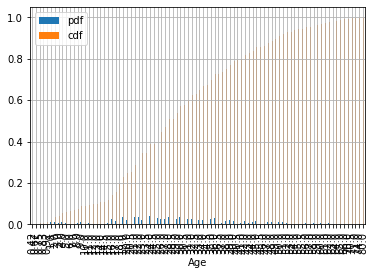

In [12]:
# Plot the discrete Probability Mass Function and CDF.
# Technically, the 'pdf label in the legend and the table the should be 'pmf'
# (Probability Mass Function) since the distribution is discrete.

# If you don't have too many values / usually discrete case
stats_df.plot.bar(x = 'Age', y = ['pdf', 'cdf'], grid = True)

In [15]:
import numpy as np
# Define your series
s = pd.Series(np.random.normal(loc = 10, scale = 0.1, size = 1000), name = 'Age')

<AxesSubplot:xlabel='Age'>

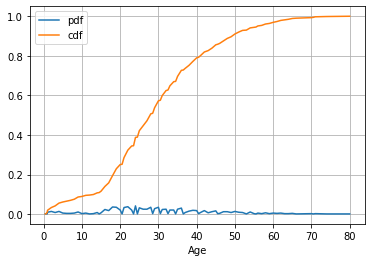

In [17]:
# Plot
stats_df.plot(x = 'Age', y = ['pdf', 'cdf'], grid = True)

In [27]:
# Create copy of original data as Age_all
# Inpute missing values with average age
avg_age = data.Age.mean()
data['Age_all'] = data.Age.fillna(avg_age)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Is_female      891 non-null bool
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Title          891 non-null object
Age_all        891 non-null float64
dtypes: bool(1), float64(3), int64(5), object(6), uint8(3)
memory usage: 101.0+ KB


In [28]:
# Create copy of age as Age_sex
data['Age_sex'] = data.Age

# Calculate average age by sex
avg_age_women = data.Age[data.Is_female==True].mean()
avg_age_men = data.Age[data.Is_female==False].mean()

# Inpute missing values with average age by sex
data.Age_sex[data.Is_female==True] = data.Age_sex[data.Is_female==1].fillna(avg_age_women)
data.Age_sex[data.Is_female==False] = data.Age_sex[data.Is_female==0].fillna(avg_age_men)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Is_female      891 non-null bool
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Title          891 non-null object
Age_all        891 non-null float64
Age_sex        891 non-null float64
dtypes: bool(1), float64(4), int64(5), object(6), uint8(3)
memory usage: 108.0+ KB


In [30]:
# Get list of titles with missing ages
titles = data.Title[data.Age.isnull()].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [25]:
# Copy original age data as Age_titles
data['Age_title']= data.Age

# Replace missing ages by title
for title in titles:
    avg_age = data.Age_title[data.Title==title].mean()
    data.Age_title[data.Title==title] = data.Age_title[data.Title==title].fillna(avg_age)

/Users/Craig_Sakuma/anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Is_female      891 non-null bool
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Title          891 non-null object
Age_all        891 non-null float64
Age_sex        891 non-null float64
Age_title      891 non-null float64
dtypes: bool(1), float64(5), int64(5), object(6), uint8(3)
memory usage: 114.9+ KB


In [31]:
data.to_csv('clean_data.csv', index=False)

In [32]:
data[data.Age.isnull()].groupby('Title')['Age_all','Age_sex','Age_title'].mean()

KeyError: "Columns not found: 'Age_title'"

In [29]:
data[data.Age.isnull()].groupby('Title')['Age_all','Age_sex','Age_title'].agg(['mean','count'])

Age_all          Age_sex        Age_title      
             mean count       mean count       mean count
Title                                                    
Dr      29.699118     1  30.726645     1  42.000000     1
Master  29.699118     4  30.726645     4   4.574167     4
Miss    29.699118    36  27.915709    36  21.773973    36
Mr      29.699118   119  30.726645   119  32.368090   119
Mrs     29.699118    17  27.915709    17  35.898148    17

In [30]:
data[data.Age.notnull()].groupby('Title')['Age'].agg(['mean','max','min','count','std'])

,mean,max,min,count,std
Title,,,,,
Capt,70.000000,70.0,70.00,1,NaN
Col,58.000000,60.0,56.00,2,2.828427
Don,40.000000,40.0,40.00,1,NaN
Dr,42.000000,54.0,23.00,6,12.016655
Jonkheer,38.000000,38.0,38.00,1,NaN
Lady,48.000000,48.0,48.00,1,NaN
Major,48.500000,52.0,45.00,2,4.949747
Master,4.574167,12.0,0.42,36,3.619872
Miss,21.773973,63.0,0.75,146,12.990292


NameError: name 'data' is not defined